In [1]:
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
from desitarget.targetmask import desi_mask, bgs_mask
from collections import Counter

In [14]:
targets = Table.read('targets/cut_bright_north.fits')
tiles = Table.read('footprint/tiles_cut_bright_north.fits')
flux_r = targets['FLUX_R']/targets['MW_TRANSMISSION_R']
flux_r[flux_r<1E-10]=1E-10
r_mag = 22.5 - 2.5*np.log10(flux_r)

# print how many bright targets we have
print(np.count_nonzero(targets['BGS_TARGET']&bgs_mask['BGS_BRIGHT']))
print(np.count_nonzero(targets['PRIORITY']>=bgs_mask['BGS_BRIGHT'].priorities['UNOBS']))

# move bright into faint
r_mag_limit = 19.5
is_new_bgs_faint = (targets['BGS_TARGET']!=0) & (r_mag > r_mag_limit)
is_old_bgs_bright = (targets['BGS_TARGET']&bgs_mask['BGS_BRIGHT'])!=0

new_bgs_mask = targets['BGS_TARGET'].copy()
new_bgs_priority = targets['PRIORITY'].copy()

new_bgs_mask[is_new_bgs_faint&is_old_bgs_bright] += (-bgs_mask['BGS_BRIGHT']+bgs_mask['BGS_FAINT'])
new_bgs_priority[is_new_bgs_faint&is_old_bgs_bright] = bgs_mask['BGS_FAINT'].priorities['UNOBS']

targets['BGS_TARGET'] = new_bgs_mask
targets['PRIORITY']  = new_bgs_priority
targets['PRIORITY_INIT'] = new_bgs_priority

# print how many bright targets we have
print(np.count_nonzero(targets['BGS_TARGET']&bgs_mask['BGS_BRIGHT']))
print(np.count_nonzero(targets['PRIORITY']>=bgs_mask['BGS_BRIGHT'].priorities['UNOBS']))

# write new file
targets.write('targets/cut_bright_north_new_limit_{:.1f}.fits'.format(r_mag_limit), overwrite=True)


661513
766281
661513
766281


In [3]:
targets

BRICKNAME,RA,DEC,FLUX_R,MW_TRANSMISSION_R,TARGETID,DESI_TARGET,BGS_TARGET,MWS_TARGET,SUBPRIORITY,PRIORITY_INIT,NUMOBS_INIT,HPXPIXEL,NUMOBS_MORE,PRIORITY,OBSCONDITIONS
str8,float64,float64,float32,float32,int64,int64,int64,int64,float64,int64,int64,int64,int64,int64,int32
1818m022,181.77270497435364,-2.2603658831771525,510.54855,0.9506506,35185706443737629,1152921504606846976,131074,0,0.7711840984536714,2100,1,25589,1,2100,4
1808m010,180.9982901636925,-1.0448662666123454,128.5318,0.95691675,35185736625948148,1152921504606846976,131074,0,0.9067837874882217,2100,1,25597,1,2100,4
1796m007,179.61471316479276,-0.6600713919651923,201.79126,0.95480496,35185742644777792,1152921504606846976,131074,0,0.07751337399126856,2100,1,25599,1,2100,4
1791m012,179.18254788962963,-1.361955063069469,370.09207,0.95590824,35185730556788874,1152921504606846976,131074,0,0.13721126692565644,2100,1,25598,1,2100,4
1843m037,184.3880729273797,-3.7349093655483006,236.19812,0.92325294,35185670267866123,1152921504606846976,131074,0,0.3400658541895716,2100,1,25559,1,2100,4
1783m022,178.30089780647222,-2.3386124589731736,135.4981,0.95411634,35185706385015650,1152921504606846976,131074,0,0.030631857859708567,2100,1,25594,1,2100,4
1808m037,180.9628339140445,-3.7095899226070346,610.3528,0.9439224,35185670209146508,1152921504606846976,131074,0,0.8817850058588774,2100,1,25585,1,2100,4
1836m035,183.71350166677445,-3.4895208857760776,1556.3829,0.93254316,35185676286692434,1152921504606846976,393222,0,0.9040868630147113,2100,1,25565,1,2100,4
1791m035,179.05088400043962,-3.433446899506383,181.30095,0.9446607,35185676211196722,1152921504606846976,393222,0,0.16264253245845706,2100,1,25586,1,2100,4


In [4]:
r = np.random.random(len(targets))
rr = r<0.001

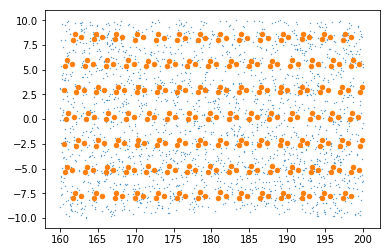

In [5]:
plt.scatter(targets['RA'][rr], targets['DEC'][rr], s=0.1)
plt.scatter(tiles['RA'], tiles['DEC'],s=20)

In [6]:
is_bright = (targets['BGS_TARGET']&bgs_mask['BGS_BRIGHT'])!=0
is_bgs =  (targets['BGS_TARGET']!=0)

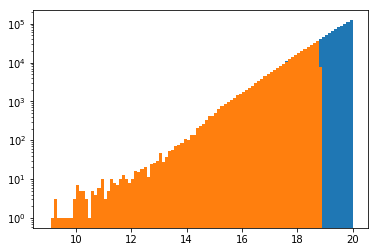

In [8]:
_ = plt.hist(r_mag[is_bgs], bins=np.linspace(9,20,100), log=True)
_ = plt.hist(r_mag[is_bright], bins=np.linspace(9,20,100), log=True)